<a href="https://colab.research.google.com/github/dantesauru-beep/Kynera-Proyect/blob/main/kynera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

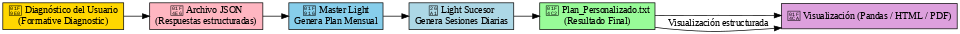

In [6]:
# =========================================================
# üß≠ DIAGRAMA DE FLUJO GENERAL - KYNERA SYSTEM
# =========================================================
from graphviz import Digraph
from IPython.display import Image, display

dot = Digraph(comment='Kynera System Workflow', format='png')
dot.attr(rankdir='LR', size='10,5')

# Nodos principales
dot.node('A', 'üß† Diagn√≥stico del Usuario\n(Formative Diagnostic)', shape='box', style='filled', fillcolor='#FFD700')
dot.node('B', 'üì¶ Archivo JSON\n(Respuestas estructuradas)', shape='box', style='filled', fillcolor='#FFB6C1')
dot.node('C', 'ü§ñ Master Light\nGenera Plan Mensual', shape='box', style='filled', fillcolor='#87CEEB')
dot.node('D', '‚ö° Light Sucesor\nGenera Sesiones Diarias', shape='box', style='filled', fillcolor='#ADD8E6')
dot.node('E', 'üìÇ Plan_Personalizado.txt\n(Resultado Final)', shape='box', style='filled', fillcolor='#98FB98')
dot.node('F', 'üìä Visualizaci√≥n (Pandas / HTML / PDF)', shape='box', style='filled', fillcolor='#DDA0DD')

# Conexiones
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF'])
dot.edge('E', 'F', label='Visualizaci√≥n estructurada', color='black')

# Mostrar en Colab
display(Image(dot.render(filename='kynera_workflow')))


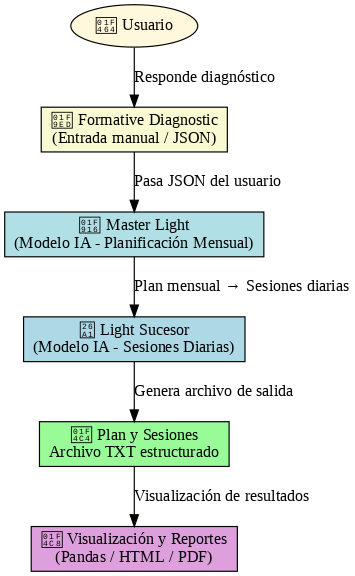

In [7]:
# =========================================================
# üß© ARQUITECTURA DE KYNERA
# =========================================================
from graphviz import Digraph
from IPython.display import Image, display

arch = Digraph(comment='Arquitectura de Kynera', format='png')
arch.attr(rankdir='TB', size='8,6')

# Capas
arch.node('U', 'üë§ Usuario', shape='ellipse', style='filled', fillcolor='#FFF8DC')
arch.node('I', 'üß≠ Formative Diagnostic\n(Entrada manual / JSON)', shape='box', style='filled', fillcolor='#FAFAD2')
arch.node('M', 'ü§ñ Master Light\n(Modelo IA - Planificaci√≥n Mensual)', shape='box', style='filled', fillcolor='#B0E0E6')
arch.node('S', '‚ö° Light Sucesor\n(Modelo IA - Sesiones Diarias)', shape='box', style='filled', fillcolor='#ADD8E6')
arch.node('T', 'üìÑ Plan y Sesiones\nArchivo TXT estructurado', shape='box', style='filled', fillcolor='#98FB98')
arch.node('V', 'üìà Visualizaci√≥n y Reportes\n(Pandas / HTML / PDF)', shape='box', style='filled', fillcolor='#DDA0DD')

# Relaciones
arch.edge('U', 'I', label='Responde diagn√≥stico')
arch.edge('I', 'M', label='Pasa JSON del usuario')
arch.edge('M', 'S', label='Plan mensual ‚Üí Sesiones diarias')
arch.edge('S', 'T', label='Genera archivo de salida')
arch.edge('T', 'V', label='Visualizaci√≥n de resultados')

display(Image(arch.render(filename='kynera_arquitectura')))


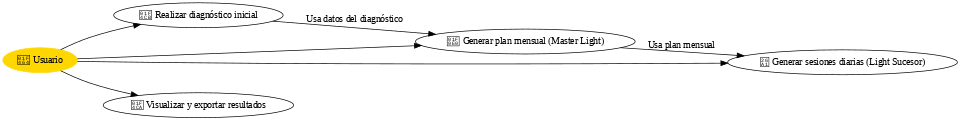

In [8]:
# =========================================================
# üé≠ DIAGRAMA DE CASOS DE USO - KYNERA
# =========================================================
from graphviz import Digraph
from IPython.display import Image, display

usecase = Digraph(comment='Kynera Use Case', format='png')
usecase.attr(rankdir='LR', size='10,5')

# Actores y casos
usecase.node('actor', 'üë§ Usuario', shape='ellipse', color='#FFD700', style='filled')
usecase.node('diag', 'üìã Realizar diagn√≥stico inicial', shape='ellipse')
usecase.node('plan', 'üß† Generar plan mensual (Master Light)', shape='ellipse')
usecase.node('ses', '‚ö° Generar sesiones diarias (Light Sucesor)', shape='ellipse')
usecase.node('view', 'üìä Visualizar y exportar resultados', shape='ellipse')

# Relaciones
usecase.edge('actor', 'diag')
usecase.edge('actor', 'plan')
usecase.edge('actor', 'ses')
usecase.edge('actor', 'view')
usecase.edge('diag', 'plan', label='Usa datos del diagn√≥stico')
usecase.edge('plan', 'ses', label='Usa plan mensual')

display(Image(usecase.render(filename='kynera_usecase')))


In [9]:
# =========================================================
# ü§ñ Kynera SYSTEM - Google Colab Version (OpenRouter)
# Generador de planes mensuales y sesiones pr√°cticas
# Autor: Diego, Luis y Manuel
# =========================================================

# 1Ô∏è‚É£ Dependencias
!pip install -q requests

#=============================================================
# Pandas
#=============================================================
!pip install pandas
import pandas as pd
import re
import os

In [10]:
from google.colab import files
import io

print("üì§ Selecciona tu archivo Plan_Personalizado.txt")
uploaded = files.upload()

# Obtener el nombre del archivo subido
nombre_archivo = list(uploaded.keys())[0]
print(f"\n‚úÖ Archivo '{nombre_archivo}' subido correctamente")

# Ahora puedes leer el archivo
with open(nombre_archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

print(f"üìÑ Contenido cargado: {len(contenido)} caracteres")

#=====================================================================
#=======================================================================
nombre_archivo = "Plan_Personalizado.txt"

# Verificar si el archivo existe

if os.path.exists(nombre_archivo):
    with open(nombre_archivo, "r", encoding="utf-8") as f:
        contenido = f.read()
    print("‚úÖ Archivo cargado correctamente")
else:
    print(f"‚ùå Error: No se encuentra el archivo '{nombre_archivo}'")
    print(f"\nüìÇ Buscando en: {os.getcwd()}")
    print("\nüìã Archivos .txt disponibles:")
    archivos_txt = [f for f in os.listdir() if f.endswith('.txt')]
    if archivos_txt:
        for archivo in archivos_txt:
            print(f"  ‚Ä¢ {archivo}")
    else:
        print("  (No hay archivos .txt en esta carpeta)")

with open(nombre_archivo, "r", encoding="utf-8") as f:
    contenido = f.read()
#=====================================================================================================
#=====================================================================================================

    #Funci√≥n: Lee el archivo de texto completo que contiene el plan de entrenamiento.
    #encoding="utf-8": Asegura la correcta lectura de caracteres especiales (tildes, emojis)
    #contenido: Variable que almacena todo el texto del archivo

#=====================================================================================================
#======================================================================================================
    patron_sesion = re.compile(
    r"D√≠a\s+(\d+).*?\n\s*- üìå Objetivo:\s*(.*?)\n\s*- üîπ Contenido:\s*(.*?)\n\s*- ‚úÖ Actividad pr√°ctica:\s*(.*?)\n\s*- üìö Recursos recomendados:\s*(.*?)\n",
    re.DOTALL
)
sesiones = re.findall(patron_sesion, contenido)

#==================================================================================================
#==================================================================================================
#Funci√≥n: Extrae informaci√≥n estructurada de cada sesi√≥n mediante un patr√≥n de b√∫squeda.
# Componentes del Patr√≥n:
#Modificadores:
# \s+: Uno o m√°s espacios en blanco
# .*?: Cualquier car√°cter (no voraz)
# re.DOTALL: Permite que . coincida con saltos de l√≠nea
#==================================================================================================
#==================================================================================================

datos = []
for num_dia, objetivo, contenido_sesion, actividad, recursos in sesiones:
    datos.append({
        "Mes": "Mes 1",
        "Semana": None,
        "Sesi√≥n": f"D√≠a {num_dia}",
        "Objetivo": objetivo.strip(),
        "Recursos sugeridos": recursos.strip().replace("‚Ä¢", "-"),
        "Nivel de avance": "Pendiente"
    })


#==================================================================================================
#==================================================================================================
# Construcci√≥n de Datos Tabulares
#Funci√≥n: Itera sobre las sesiones extra√≠das y crea un diccionario por cada una.
#Campos creados:

#Mes: Actualmente fijo en "Mes 1"
#Semana: Se calcular√° posteriormente
#Sesi√≥n: Identificador del d√≠a (ej: "D√≠a 1")
#Objetivo: Texto del objetivo limpio de espacios
#Recursos sugeridos: Recursos con vi√±etas convertidas de ‚Ä¢ a -
#Nivel de avance: Estado inicial como "Pendiente"

#==================================================================================================
#==================================================================================================

# Creaci√≥n del DataFrame
df = pd.DataFrame(datos, columns=["Mes", "Semana", "Sesi√≥n", "Objetivo", "Recursos sugeridos", "Nivel de avance"])

#C√°lculo Autom√°tico de Semanas

df["Semana"] = df["Sesi√≥n"].apply(lambda x: f"Semana {((int(x.split()[1]) - 1) // 3) + 1}")

df = df.sort_values(by=["Semana", "Sesi√≥n"]).reset_index(drop=True)


#==================================================================================================
#==================================================================================================
#Funci√≥n:

# Ordena primero por semana, luego por sesi√≥n
# reset_index(drop=True): Reinicia los √≠ndices num√©ricos consecutivamente

#==================================================================================================
#==================================================================================================

def estilo_tabla(df):
    return (
        df.style
        .set_table_styles([
            {"selector": "th", "props": [("background-color", "#3B82F6"), ("color", "white"), ("font-weight", "bold")]},
            {"selector": "td", "props": [("border", "1px solid #D1D5DB"), ("padding", "8px")]},
            {"selector": "tr:nth-child(even)", "props": [("background-color", "#F3F4F6")]}
        ])
        .set_properties(**{"text-align": "left"})
        .hide(axis="index")
    )



#==================================================================================================
#==================================================================================================

# Funci√≥n: Aplica estilos CSS a la tabla para mejorar su visualizaci√≥n

#Configuraciones adicionales:

# text-align: left: Alineaci√≥n izquierda del texto
# hide(axis="index"): Oculta la columna de √≠ndices num√©ricos
#==================================================================================================
#==================================================================================================

estilo_tabla(df)


üì§ Selecciona tu archivo Plan_Personalizado.txt


Saving Plan_Personalizado.txt to Plan_Personalizado.txt

‚úÖ Archivo 'Plan_Personalizado.txt' subido correctamente
üìÑ Contenido cargado: 858 caracteres
‚úÖ Archivo cargado correctamente


HTML

In [ ]:
from IPython.display import HTML

HTML('''
<style>
  * {
    margin: 0;
    padding: 0;
    box-sizing: border-box;
  }

  body {
    font-family: Arial, sans-serif;
  }
   .navegacion {
    background: #333;
    padding: 0;
    display: flex;
    justify-content: center;
    box-shadow: 0 2px 5px rgba(0,0,0,0.2);
  }

  .navegacion button {
    background: #333;
    color: white;
    border: none;
    padding: 15px 30px;
    cursor: pointer;
    font-size: 1.1em;
    transition: background 0.3s;
    border-bottom: 3px solid transparent;
  }

  .navegacion button:hover {
    background: #555;
  }

  .navegacion button.active {
    background: #ff0000;
    border-bottom: 3px solid white;
  }

   .pagina1-content {
    background: linear-gradient(to bottom, #D6DBE1, #8A97A5, #1D2E3F);
    padding: 80px 50px;
    text-align: center;
    min-height: 500px;
    display: flex;
    flex-direction: column;
    justify-content: center;
    align-items: center;
  }

  .pagina1-content h1 {
    color: white;
    font-size: 3.5em;
    margin-bottom: 20px;
    text-shadow: 3px 3px 6px rgba(0,0,0,0.7);
  }

  .pagina1-content p {
    color: white;
    font-size: 1.3em;
    margin-top: 20px;
  }

  .boton-ir {
    margin-top: 40px;
    padding: 15px 40px;
    background: white;
    color: #ff0000;
    border: none;
    border-radius: 30px;
    font-weight: bold;
    font-size: 1.3em;
    cursor: pointer;
    transition: transform 0.3s;
     box-shadow: 0 0 10px #6baa75;
  }

  button:hover {
    background: linear-gradient(to right, #B46B5E, #8A5047);
    box-shadow: 0 0 20px #FFFFFF;
    color: #000;
    transform: scale(1.05);
  }


/* P√ÅGINA 2 */

  :root{--bg:#0f1724;--card:#0b1220;--muted:#9aa4b2;--accent:#6ee7b7}
body{font-family:Inter,system-ui,-apple-system,BlinkMacSystemFont,"Segoe UI",Roboto,"Helvetica Neue",Arial;margin:0;background:linear-gradient(180deg,#071025 0%,#071c2a 100%);color:#e6eef6}
.app{max-width:980px;margin:36px auto;padding:20px}
header{display:flex;align-items:center;gap:16px}
h1{margin:0;font-size:20px}
.layout{display:grid;grid-template-columns:220px 1fr;gap:18px;margin-top:18px}
.panel{background:var(--card);padding:14px;border-radius:12px;box-shadow:0 6px 18px rgba(2,6,23,.6)}
.user-list{display:flex;flex-direction:column;gap:8px}
.user-btn{background:transparent;border:1px solid rgba(255,255,255,0.04);padding:10px;border-radius:8px;color:var(--muted);cursor:pointer;text-align:left}
.user-btn.active{border-color:var(--accent);color:#06241b;background:linear-gradient(90deg, rgba(110,231,183,0.08), transparent)}
.card-title{font-weight:600;margin-bottom:10px}
.plan-items{display:grid;gap:10px}
.plan-item{background:linear-gradient(180deg, rgba(255,255,255,0.02), transparent);padding:10px;border-radius:8px}
.progress{height:12px;background:rgba(255,255,255,0.06);border-radius:999px;overflow:hidden}
.progress > i{display:block;height:100%;background:linear-gradient(90deg,var(--accent),#60a5fa);width:0;transition:width .6s ease}
.controls{display:flex;gap:8px;margin-top:12px}
button{padding:8px 12px;border-radius:8px;border:none;cursor:pointer}
.btn-primary{background:var(--accent);color:#00261f}
.btn-ghost{background:transparent;color:var(--muted);border:1px solid rgba(255,255,255,0.04)}
footer{margin-top:16px;color:var(--muted);font-size:13px}
.small{font-size:13px;color:var(--muted)}
.stat{display:flex;gap:10px;align-items:center}
.pill{background:rgba(255,255,255,0.03);padding:6px 8px;border-radius:999px;font-weight:600}
  </style>
<!-- barra de Navegaci√≥n -->
<div class="navegacion">
  <button class="btn-nav active" onclick="mostrarPagina(1)">Kynera</button>
  <button class="btn-nav" onclick="mostrarPagina(2)">Niveles</button>
  <button class="btn-nav" onclick="mostrarPagina(3)">Resultados</button>
</div>

<!--Creaci√≥n pag 1-->
<div id="pagina1" class="pagina active">
  <div class="pagina1-content">
    <h1> Bienvenido a Kynera</h1>
    <p>M√°s que software, un acompa√±ante para tu camino profesional.</p>
    <img src="https://png.pngtree.com/png-clipart/20190611/original/pngtree-wolf-logo-png-image_2306634.jpg" height="100px" >
    <button class="boton-ir" onclick="mostrarPagina(2)">
      Empezar ahora
    </button>
  </div>
</div>

<!--pagina 2-->
<body>
  <div id="pagina2" class="pagina">
  <div class="pagina2-content">
    <div class="header2">
      <h1>üåüP√°gina 2 - Contenido Principal</h1>
      <p>Bienvenido a la segunda p√°gina del sitio</p>
    </div>
<div class="app">
<header>
<img src="data:image/svg+xml;utf8,<svg xmlns='http://www.w3.org/2000/svg' width='40' height='40'><rect width='40' height='40' rx='8' fill='%236ee7b7'/></svg>" alt="logo" style="border-radius:8px"/>
<div>
<h1>Kynera ‚Äî Plan individual y progreso</h1>
<div class="small">Simulaci√≥n interactiva ‚Äî cambia de usuario y observa el avance</div>
</div>
</header>

<div class="layout">
<aside class="panel">
<div class="card-title">Usuarios</div>
<div class="user-list" id="userList"></div>
<div style="margin-top:12px" class="small">Usa los controles abajo para simular progreso global.</div>
<div class="controls" style="margin-top:12px">
<button class="btn-primary" id="simulateAll">Simular +10%</button>
<button class="btn-ghost" id="resetAll">Reset</button>
</div>
</aside>
<main class="panel">
<div style="display:flex;justify-content:space-between;align-items:center">
<div>
<div class="card-title" id="profileName">Selecciona un usuario</div>
<div class="small" id="profileMeta">Plan: ‚Äî ¬∑ Progreso: ‚Äî</div>
</div>
<div class="stat">
<div class="pill" id="overallPct">--%</div>
</div>
</div>


<section style="margin-top:14px">
<div class="card-title">Plan (Mes ‚Üí Semana ‚Üí Sesi√≥n)</div>
<div class="plan-items" id="planItems"></div>
</section>


<section style="margin-top:14px">
<div class="card-title">Acciones</div>
<div class="controls">
<button class="btn-primary" id="advanceSession">Marcar pr√≥xima sesi√≥n como completada</button>
<button class="btn-ghost" id="randomize">Simular aleatorio</button>
</div>
</section>


<footer>
<div id="log" class="small"></div>
</footer>
</main>
</div>
</div>


<!-- Scripts pag 2-->
<script>
// Navegaci√≥n entre p√°ginas
  function mostrarPagina(num) {
    // Ocultar todas las p√°ginas
    document.querySelectorAll('.pagina').forEach(pagina => {
      pagina.classList.remove('active');
    });

    // Mostrar la p√°gina seleccionada
    document.getElementById('pagina' + num).classList.add('active');

    // Actualizar botones de navegaci√≥n
    document.querySelectorAll('.btn-nav').forEach(btn => {
      btn.classList.remove('active');
    });
    document.querySelectorAll('.btn-nav')[num - 1].classList.add('active');
  }
// Fin navegaci√≥n

const user = state.users.find(x=>x.id===activeUserId);
if(user){
const pct = calcProgress(user);
$profileName.textContent = user.name;
$profileMeta.textContent = `Plan: ${user.plan.length} mes(es) ¬∑ Progreso: ${pct}%`;
$overallPct.textContent = pct + '%';
}
}


// Botones de acci√≥n
document.getElementById('advanceSession').addEventListener('click', ()=>{
const user = state.users.find(x=>x.id===activeUserId);
if(!user) return;
// marcar la primera sesi√≥n no completada
for(const m of user.plan){
for(const w of m.weeks){
const next = w.sessions.find(s=>!s.done);
if(next){ next.done = true; save(); render(); log('Sesi√≥n completada (simulada).'); return; }
}
}
log('Todas las sesiones ya est√°n completadas.');
});


document.getElementById('randomize').addEventListener('click', ()=>{
const user = state.users.find(x=>x.id===activeUserId);
if(!user) return;
// set aleatorio
user.plan.forEach(m=>m.weeks.forEach(w=>w.sessions.forEach(s=>s.done = Math.random() > 0.5 )));
save(); render(); log('Progreso aleatorio aplicado.');
});


document.getElementById('simulateAll').addEventListener('click', ()=>{
// a√±adir +10% aproximado repartiendo completados
state.users.forEach(u=>{
const totalSessions = u.plan.flatMap(m=>m.weeks).flatMap(w=>w.sessions);
const undone = totalSessions.filter(s=>!s.done);
const toMark = Math.ceil(undone.length * 0.1);
for(let i=0;i<toMark;i++) if(undone[i]) undone[i].done = true;
});
save(); render(); log('Simulaci√≥n global: +10% aplicada.');
});


document.getElementById('resetAll').addEventListener('click', ()=>{
if(!confirm('Resetear todo el progreso a estado inicial?')) return;
// resetear a los valores de la variable users de ejemplo
state.users = users.map(u=>JSON.parse(JSON.stringify(u)));
save(); render(); log('Progreso reseteado.');
});


// Inicializar estado si no existe en storage
if(!persisted) save();
render();
</script>

<!-- Scripts pag 2-->


  ''')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

semanas = ["Semana 1", "Semana 2", "Semana 3", "Semana 4"]
progreso_esperado = [60, 70, 80, 90]   # % esperado
progreso_real = [55, 75, 72, 88]       # % real

# Mostrar tabla (opcional)
df = pd.DataFrame({
    "Semana": semanas,
    "Esperado (%)": progreso_esperado,
    "Real (%)": progreso_real
})
print(df)

# Gr√°fica
plt.figure(figsize=(8,4.5))
plt.plot(semanas, progreso_esperado, marker='o', label='Esperado')
plt.plot(semanas, progreso_real, marker='o', label='Real')
plt.title("Progreso del usuario - Persona 1")
plt.xlabel("Semanas")
plt.ylabel("Porcentaje de avance (%)")
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.3)

# Guardar para usar en la web
plt.tight_layout()
plt.savefig("progreso_persona1.png")
plt.show()


In [13]:
# ===========================================
# üîÆ Kynera SYSTEM  - Master Light + Light Sucesor
# Entrada JSON personalizada (OpenRouter)
# ===========================================

import requests
import json
from datetime import datetime

# --- CONFIGURACI√ìN ---
API_KEY = "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"
ENDPOINT = "https://openrouter.ai/api/v1/chat/completions"
MODEL = "meta-llama/llama-3.1-70b-instruct"

# --- PROMPTS PRINCIPALES ---

PROMPT_MASTER_LIGHT = """
Eres Master Light, un sistema de IA especializado en generar rutas de aprendizaje estructuradas que desarrollan progresivamente la experticia en cualquier campo.

## üéØ Tareas Principales
Dise√±ar un plan que incluya:
1. Objetivo mensual claro y espec√≠fico basado en la informaci√≥n del usuario.
2. Temas y metas semanales detalladas.
3. Recursos de aprendizaje de alta calidad y diversidad.
4. Evaluaci√≥n y reflexi√≥n mensual para autoan√°lisis y mejora continua.

> ‚ö†Ô∏è No generes actividades diarias. Otros asistentes se encargan de eso.

## ‚úÖ Formato de Salida Requerido
Entrega el plan en formato Markdown, siguiendo esta estructura:

## Mes 1

### üéØ Meta del mes:
[Texto claro y espec√≠fico]

### üîó Alineaci√≥n con el objetivo principal:
[C√≥mo este mes contribuye al objetivo general del usuario]

### Semana 1: [Nombre del tema]
- Objetivo:
- Recursos:
  - [Recurso 1] ‚Äì Breve explicaci√≥n
  - [Recurso 2] ‚Äì Breve explicaci√≥n

### Semana 2:
...

### Semana 3:
...

### Semana 4:
...

### üìä Evaluaci√≥n del Mes:
- Aprendizajes:
- Dificultades:
- Ajustes:
"""

PROMPT_LIGHT_SUCESOR = """
Eres Light Sucesor, un asistente de aprendizaje de IA especializado en generar actividades pr√°cticas y estructuradas para desarrollar habilidades en sesiones diarias, siguiendo la planificaci√≥n de Master Light.

## üìã Directrices
1Ô∏è‚É£ Usa el plan mensual proporcionado por Master Light.
2Ô∏è‚É£ Genera sesiones diarias basadas en ese plan (3 por semana, o seg√∫n disponibilidad).
3Ô∏è‚É£ Cada sesi√≥n debe tener un objetivo, contenido explicativo, una actividad pr√°ctica y recursos recomendados.
4Ô∏è‚É£ Enf√≥cate en el progreso gradual y el aprendizaje activo.

## üìÖ Formato de salida
**Semana [X]: [Tema]**
- D√≠a [Y]: [Nombre de la sesi√≥n]
  - üìå Objetivo:
  - üîπ Contenido:
  - ‚úÖ Actividad pr√°ctica:
  - üìö Recursos recomendados:
"""

# --- FUNCI√ìN GENERAL DE CONSULTA ---
def consultar_openrouter(prompt, user_input):
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "HTTP-Referer": "https://openrouter.ai",  # üëà recomendado por OpenRouter
        "X-Title": "VARGA Plan Generator",
        "Content-Type": "application/json"
    }
    payload = {
        "model": MODEL,
        "messages": [
            {"role": "system", "content": prompt},
            {"role": "user", "content": user_input}
        ],
        "temperature": 0.7,
        "max_tokens": 2048
    }
    response = requests.post(ENDPOINT, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            return response.json()["choices"][0]["message"]["content"]
        except KeyError:
            print("‚ö†Ô∏è Error: respuesta sin contenido v√°lido.")
            print(response.json())
            return None
    else:
        print(f"‚ùå Error {response.status_code}: {response.text}")
        return None


# --- ENTRADA JSON DE USUARIO ---
usuario_json = {
  "objetivo": "Mejorar mi desempe√±o en el examen ICFES Saber 11",
  "nivel_actual": "Intermedio",
  "experiencia_previa": "Curso ICFES UNAD, libros de preparaci√≥n, pr√°ctica no estructurada",
  "tiempo_disponible": "6 horas semanales",
  "recursos_disponibles": [
    "Celular y computadora (uso parcial)",
    "Libros f√≠sicos de preparaci√≥n",
    "Internet",
    "Plataforma SaberPro UNAD",
    "Icfes Interactivo",
    "Khan Academy",
    "YouTube: Julioprofe, Profe Majo, Ciencias Naturales Saber"
  ],
  "dificultades_previas": "Desorganizaci√≥n, falta de rutina, saturaci√≥n de tareas",
  "metodo_de_aprendizaje_preferido": "Pr√°ctica intensiva, simulacros, revisi√≥n de errores, lectura cr√≠tica",
  "resultados_esperados": "Subir el puntaje, dominar t√©cnicas de lectura/respuesta, identificar fortalezas y debilidades",
  "tiempo_a_desarrollar": "1 mes"
}

# Mostrar JSON
print("üßæ Datos del usuario cargados:")
print(json.dumps(usuario_json, indent=2, ensure_ascii=False))

# --- PASO 1: Generar Plan Mensual ---
print("\n‚è≥ Generando plan mensual personalizado con Master Light...\n")
input_master = f"""
Basado en el siguiente perfil de usuario en formato JSON, genera un plan mensual estructurado:

{json.dumps(usuario_json, indent=2, ensure_ascii=False)}
"""
plan_texto = consultar_openrouter(PROMPT_MASTER_LIGHT, input_master)

if not plan_texto:
    raise Exception("No se pudo generar el plan mensual.")

# --- PASO 2: Generar Sesiones Diarias ---
print("\n‚è≥ Generando sesiones diarias personalizadas con Light Sucesor...\n")
input_sucesor = f"""
Bas√°ndote en este plan mensual, genera sesiones diarias completas y coherentes con la informaci√≥n del usuario.
Cada semana debe tener 3 sesiones.
Incluye los nombres de los d√≠as (D√≠a 1, D√≠a 2, D√≠a 3, etc.) y aseg√∫rate de que el contenido sea variado y aplicable.

PLAN DE REFERENCIA:
{plan_texto}

PERFIL DE USUARIO:
{json.dumps(usuario_json, indent=2, ensure_ascii=False)}
"""
sesiones_texto = consultar_openrouter(PROMPT_LIGHT_SUCESOR, input_sucesor)

if not sesiones_texto:
    raise Exception("No se pudo generar las sesiones diarias.")

# --- PASO 3: GUARDAR EN TXT ---
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
nombre_archivo = f"VARGA_PLAN_Y_SESIONES_PERSONALIZADO_{timestamp}.txt"

with open(nombre_archivo, "w", encoding="utf-8") as f:
    f.write("üß≠ PLAN MENSUAL - MASTER LIGHT\n\n")
    f.write(plan_texto)
    f.write("\n\n==============================\n\n")
    f.write("‚ö° SESIONES DIARIAS - LIGHT SUCESOR\n\n")
    f.write(sesiones_texto)

# --- SALIDA FINAL ---
print(f"\n‚úÖ Archivo generado: {nombre_archivo}\n")
print("üìÑ --- PLAN MENSUAL ---\n")
print(plan_texto)
print("\n\nüìÑ --- SESIONES DIARIAS ---\n")
print(sesiones_texto)


üßæ Datos del usuario cargados:
{
  "objetivo": "Mejorar mi desempe√±o en el examen ICFES Saber 11",
  "nivel_actual": "Intermedio",
  "experiencia_previa": "Curso ICFES UNAD, libros de preparaci√≥n, pr√°ctica no estructurada",
  "tiempo_disponible": "6 horas semanales",
  "recursos_disponibles": [
    "Celular y computadora (uso parcial)",
    "Libros f√≠sicos de preparaci√≥n",
    "Internet",
    "Plataforma SaberPro UNAD",
    "Icfes Interactivo",
    "Khan Academy",
    "YouTube: Julioprofe, Profe Majo, Ciencias Naturales Saber"
  ],
  "dificultades_previas": "Desorganizaci√≥n, falta de rutina, saturaci√≥n de tareas",
  "metodo_de_aprendizaje_preferido": "Pr√°ctica intensiva, simulacros, revisi√≥n de errores, lectura cr√≠tica",
  "resultados_esperados": "Subir el puntaje, dominar t√©cnicas de lectura/respuesta, identificar fortalezas y debilidades",
  "tiempo_a_desarrollar": "1 mes"
}

‚è≥ Generando plan mensual personalizado con Master Light...


‚è≥ Generando sesiones diarias pe